# Data Extraction and Feature Engineering

# Correct as of 22nd Feb 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import yfinance as yf
import requests

# Statsmodels for time series analysis
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Sklearn for metrics and parameter grid
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import ParameterGrid

# Disable warnings and logging
#warnings.filterwarnings("ignore")
#logging.disable(logging.CRITICAL)

pd.set_option('display.max_rows',60000)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth',200)
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
missing_holidays = [
    pd.Timestamp('2016-01-18'), pd.Timestamp('2016-02-15'), pd.Timestamp('2016-03-25'), pd.Timestamp('2016-05-30'),
    pd.Timestamp('2016-07-04'), pd.Timestamp('2016-09-05'), pd.Timestamp('2016-11-24'), pd.Timestamp('2016-12-26'),
    pd.Timestamp('2017-01-02'), pd.Timestamp('2017-01-16'), pd.Timestamp('2017-02-20'), pd.Timestamp('2017-04-14'),
    pd.Timestamp('2017-05-29'), pd.Timestamp('2017-07-04'), pd.Timestamp('2017-09-04'), pd.Timestamp('2017-11-23'),
    pd.Timestamp('2017-12-25'), pd.Timestamp('2018-01-01'), pd.Timestamp('2018-01-15'), pd.Timestamp('2018-02-19'),
    pd.Timestamp('2018-03-30'), pd.Timestamp('2018-05-28'), pd.Timestamp('2018-07-04'), pd.Timestamp('2018-09-03'),
    pd.Timestamp('2018-11-22'), pd.Timestamp('2018-12-05'), pd.Timestamp('2018-12-25'), pd.Timestamp('2019-01-01'),
    pd.Timestamp('2019-01-21'), pd.Timestamp('2019-02-18'), pd.Timestamp('2019-04-19'), pd.Timestamp('2019-05-27'),
    pd.Timestamp('2019-07-04'), pd.Timestamp('2019-09-02'), pd.Timestamp('2019-11-28'), pd.Timestamp('2019-12-25'),
    pd.Timestamp('2020-01-01'), pd.Timestamp('2020-01-20'), pd.Timestamp('2020-02-17'), pd.Timestamp('2020-04-10'),
    pd.Timestamp('2020-05-25'), pd.Timestamp('2020-07-03'), pd.Timestamp('2020-09-07'), pd.Timestamp('2020-11-26'),
    pd.Timestamp('2020-12-25'), pd.Timestamp('2021-01-01'), pd.Timestamp('2021-01-18'), pd.Timestamp('2021-02-15'),
    pd.Timestamp('2021-04-02'), pd.Timestamp('2021-05-31'), pd.Timestamp('2021-07-05'), pd.Timestamp('2021-09-06'),
    pd.Timestamp('2021-11-25'), pd.Timestamp('2021-12-24'), pd.Timestamp('2022-01-17'), pd.Timestamp('2022-02-21'),
    pd.Timestamp('2022-04-15'), pd.Timestamp('2022-05-30'), pd.Timestamp('2022-06-20'), pd.Timestamp('2022-07-04'),
    pd.Timestamp('2022-09-05'), pd.Timestamp('2022-11-24'), pd.Timestamp('2022-12-26'), pd.Timestamp('2023-01-02'),
    pd.Timestamp('2023-01-16'), pd.Timestamp('2023-02-20'), pd.Timestamp('2023-04-07'), pd.Timestamp('2023-05-29'),
    pd.Timestamp('2023-06-19'), pd.Timestamp('2023-07-04'), pd.Timestamp('2023-09-04'), pd.Timestamp('2023-11-23'),
    pd.Timestamp('2023-12-25'), pd.Timestamp('2024-01-01'), pd.Timestamp('2024-01-15'), pd.Timestamp('2024-02-19'),
    pd.Timestamp('2024-03-29'), pd.Timestamp('2024-05-27'), pd.Timestamp('2024-06-19'), pd.Timestamp('2024-07-04'),
    pd.Timestamp('2024-09-02'), pd.Timestamp('2024-11-28')
]

In [200]:
class Base_Extraction_And_Feature_Engineer:
    missing_holidays = [
    pd.Timestamp('2016-01-18'), pd.Timestamp('2016-02-15'), pd.Timestamp('2016-03-25'), pd.Timestamp('2016-05-30'),
    pd.Timestamp('2016-07-04'), pd.Timestamp('2016-09-05'), pd.Timestamp('2016-11-24'), pd.Timestamp('2016-12-26'),
    pd.Timestamp('2017-01-02'), pd.Timestamp('2017-01-16'), pd.Timestamp('2017-02-20'), pd.Timestamp('2017-04-14'),
    pd.Timestamp('2017-05-29'), pd.Timestamp('2017-07-04'), pd.Timestamp('2017-09-04'), pd.Timestamp('2017-11-23'),
    pd.Timestamp('2017-12-25'), pd.Timestamp('2018-01-01'), pd.Timestamp('2018-01-15'), pd.Timestamp('2018-02-19'),
    pd.Timestamp('2018-03-30'), pd.Timestamp('2018-05-28'), pd.Timestamp('2018-07-04'), pd.Timestamp('2018-09-03'),
    pd.Timestamp('2018-11-22'), pd.Timestamp('2018-12-05'), pd.Timestamp('2018-12-25'), pd.Timestamp('2019-01-01'),
    pd.Timestamp('2019-01-21'), pd.Timestamp('2019-02-18'), pd.Timestamp('2019-04-19'), pd.Timestamp('2019-05-27'),
    pd.Timestamp('2019-07-04'), pd.Timestamp('2019-09-02'), pd.Timestamp('2019-11-28'), pd.Timestamp('2019-12-25'),
    pd.Timestamp('2020-01-01'), pd.Timestamp('2020-01-20'), pd.Timestamp('2020-02-17'), pd.Timestamp('2020-04-10'),
    pd.Timestamp('2020-05-25'), pd.Timestamp('2020-07-03'), pd.Timestamp('2020-09-07'), pd.Timestamp('2020-11-26'),
    pd.Timestamp('2020-12-25'), pd.Timestamp('2021-01-01'), pd.Timestamp('2021-01-18'), pd.Timestamp('2021-02-15'),
    pd.Timestamp('2021-04-02'), pd.Timestamp('2021-05-31'), pd.Timestamp('2021-07-05'), pd.Timestamp('2021-09-06'),
    pd.Timestamp('2021-11-25'), pd.Timestamp('2021-12-24'), pd.Timestamp('2022-01-17'), pd.Timestamp('2022-02-21'),
    pd.Timestamp('2022-04-15'), pd.Timestamp('2022-05-30'), pd.Timestamp('2022-06-20'), pd.Timestamp('2022-07-04'),
    pd.Timestamp('2022-09-05'), pd.Timestamp('2022-11-24'), pd.Timestamp('2022-12-26'), pd.Timestamp('2023-01-02'),
    pd.Timestamp('2023-01-16'), pd.Timestamp('2023-02-20'), pd.Timestamp('2023-04-07'), pd.Timestamp('2023-05-29'),
    pd.Timestamp('2023-06-19'), pd.Timestamp('2023-07-04'), pd.Timestamp('2023-09-04'), pd.Timestamp('2023-11-23'),
    pd.Timestamp('2023-12-25'), pd.Timestamp('2024-01-01'), pd.Timestamp('2024-01-15'), pd.Timestamp('2024-02-19'),
    pd.Timestamp('2024-03-29'), pd.Timestamp('2024-05-27'), pd.Timestamp('2024-06-19'), pd.Timestamp('2024-07-04'),
    pd.Timestamp('2024-09-02'), pd.Timestamp('2024-11-28')
 ]
    def __init__(self, data_json):
        self.data_json = data_json
        self.listing = data_json['stock_list']
        self.start_date = data_json['start_date']
        self.end_date = data_json['end_date']

        self.list_of_base_dfs= None
        self.list_of_fengin_dfs = None
        self.df_base = None
        self.df_w_feng = None
        
        self.collect_data_1() 
        self.collect_data_2()

    def base_extraction(self, ticker, start_date, end_date):
        #this is for one ticker only
        df_1 = yf.Ticker(ticker).history(start=start_date, end=end_date, interval='1d')\
            [['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']].reset_index()

        df_1['ticker_id'] = ticker
        df_1['Date'] = pd.to_datetime(df_1['Date'], utc=False)
        df_1['Date'] = df_1['Date'].dt.tz_localize(None)
        df_1.index = df_1['Date']  # To be used for joining for this exercise only, to be dropped later

        df_1['Dividends'] = df_1['Dividends'].apply(lambda x: 1 if x > 0 else 0)
        df_1['Volume'] = df_1['Volume'] / 1_000_000
        df_1['stock_returns'] = df_1['Close'].pct_change()

        stock_sector_info = yf.Ticker(ticker).info
        sector = stock_sector_info.get('sector', 'Unknown')  # Fallback to 'Unknown' if not found
        df_1['sector'] = sector
        df_1.columns = [c.lower() for c in df_1.columns]

        #vix 
        vix = self.fetch_vix()
        stock_data_ = pd.merge(df_1, vix, left_index=True, right_index=True, how='left')

        #eps 
        eps_table = self.fetch_eps(ticker)
        stock_data = pd.merge(stock_data_, eps_table, left_index=True, right_index=True, how='left')
        stock_data['earnings_date_flag'] = stock_data['earnings_date'].notna().astype(int)
        d1,d2,d3 = eps_table.loc[eps_table['earnings_date']<stock_data['earnings_date'].min()].head(1)\
        [['eps_estimate', 'reported_eps', 'surprise_']].values[0]
        # Fill forward for the specified columns
        columns_to_fill = ['eps_estimate', 'reported_eps', 'surprise_']
        stock_data[columns_to_fill] = stock_data[columns_to_fill].ffill()
        stock_data['eps_estimate'] = stock_data['eps_estimate'].fillna(d1) 
        stock_data['reported_eps'] = stock_data['reported_eps'].fillna(d2)
        stock_data['surprise_'] = stock_data['surprise_'].fillna(d3)
        stock_data = stock_data.drop(columns=['symbol', 'earnings_date'])
        stock_data['pe_ratio'] = stock_data['close'] / stock_data['reported_eps'] # Calculate P/E ratio

        int_table = self.fetch_interest()
        stock_data = pd.merge(stock_data, int_table, left_index=True, right_index=True, how='left')

        sp500_table = self.fetch_sp500()
        stock_data = pd.merge(stock_data, sp500_table, left_index=True, right_index=True, how='left')

        return (stock_data)

    def fetch_vix(self, ticker="^VIX"):
        # Fetch VIX data
        vix_data = yf.Ticker(ticker)
        vix = vix_data.history(start=self.start_date, end=self.end_date)[['Close']]
        vix = vix.rename(columns={'Close':'vix'})
        vix.index = vix.index.date
        return (vix) 

    def fetch_eps(self,ticker): 
        df_eps_ = pd.read_csv('eps_earnings.csv')
        for i in ['EPS Estimate', 'Reported EPS','Surprise (%)']:
            df_eps_[i] = df_eps_[i] = pd.to_numeric(df_eps_[col], errors='coerce')
 
        df_eps = df_eps_[df_eps_['Symbol']==ticker].reset_index(drop=True)
        # Convert "Earnings Date" to pandas datetime format
        df_eps["Earnings Date"] = df_eps["Earnings Date"].apply(lambda x: x[:-12])
        df_eps["Earnings Date"] = pd.to_datetime(df_eps['Earnings Date'], format = '%B %d, %Y', errors = 'coerce')
        df_eps.columns = [col.lower().replace(" ", "_").replace("(%)", "") for col in df_eps.columns]
        df_eps = df_eps[['symbol','earnings_date', 'eps_estimate',	'reported_eps',	'surprise_']].copy()
        df_eps.index = df_eps.earnings_date
        return(df_eps)

    def fetch_interest(self):
        df_int = pd.read_csv('treasury.csv')
        df_int['Date'] = pd.to_datetime(df_int['Date'], dayfirst=True)
        df_int.index = df_int.Date
        df_int.columns = [col.lower().replace(" ", "_")+ "_int" for col in df_int.columns]

        df_int = df_int[['1_mo_int','6_mo_int', '1_yr_int','10_yr_int']].copy()
        
        for i in ['1_mo_int','6_mo_int', '1_yr_int','10_yr_int']: 
            df_int[i] = df_int[i]* 0.01
            
        return(df_int)

    def fetch_sp500(self, ticker="^GSPC"):
        sp500_ticker = yf.Ticker(ticker)
        sp500_data = sp500_ticker.history(start=self.start_date, end=self.end_date)[['Open', 'High', 'Low', 'Close', 'Volume']]
        sp500_data = sp500_data.rename(columns={'Close':'sp500_price',
                                            'Volume':'sp500_volume',
                                            'Low':'sp500_low',
                                            'Open':'sp500_open',
                                            'High':'sp500_high'})
        sp500_data.index = sp500_data.index.date

        sp500_data['sp500_volume'] = sp500_data['sp500_volume']/1_000_000
        return(sp500_data)

    def sp500_feng(self, sp500_data):
        ###### 
        sp500_data['mkt_returns'] = sp500_data['sp500_price'].pct_change()

        sp500_data['sp500_oc'] = (sp500_data['sp500_open'] + sp500_data['sp500_price'])/2
        sp500_data['sp500_lh'] = (sp500_data['sp500_low'] + sp500_data['sp500_high'])/2
        sp500_data['sp500_loh'] = (sp500_data['sp500_low'] +sp500_data['sp500_open']+ sp500_data['sp500_high'])/3

        sp500_data['50_day_avg_sp500'] = sp500_data['sp500_price'].rolling(window=50).mean()
        sp500_data['150_day_avg_sp500'] = sp500_data['sp500_price'].rolling(window=150).mean()

        sp500_data['50_day_avg_sp500_relative'] = sp500_data['sp500_price'] - sp500_data['50_day_avg_sp500']
        sp500_data['150_day_avg_sp500_relative'] = sp500_data['sp500_price'] - sp500_data['150_day_avg_sp500']
    
        # Create a column for Bull/Bear indicator: 1 for Bull, -1 for Bear
        sp500_data['sp500_bull_bear'] = 0  # Initialize with 0 (neutral)
        # Bullish signal: When 50-day moving average is greater than 150-day
        sp500_data.loc[sp500_data['50_day_avg_sp500'] > sp500_data['150_day_avg_sp500'], 'sp500_bull_bear'] = 1
        # Bearish signal: When 50-day moving average is less than 150-day
        sp500_data.loc[sp500_data['50_day_avg_sp500'] < sp500_data['150_day_avg_sp500'], 'sp500_bull_bear'] = 0
        sp500_data['sp500_bb_diff'] = sp500_data['50_day_avg_sp500'] - sp500_data['150_day_avg_sp500']

        # # 4. Combine both stock and market returns in a single DataFrame
        df_join = pd.concat([ sp500_data['stock_returns'], sp500_data['mkt_returns']], axis=1).dropna()

        window = 60  # Define rolling window size
        # # Manually calculate rolling covariance using np.cov
        rolling_covariances = []
        for i in range(window - 1, len(df_join)):
            stock_window = df_join['stock_returns'][i - window + 1:i + 1]
            mkt_window = df_join['mkt_returns'][i - window + 1:i + 1]
    
            # Calculate covariance matrix and get the covariance between the two variables
            cov_matrix = np.cov(stock_window, mkt_window)
            rolling_cov = cov_matrix[0, 1]  # Extract the covariance between stock_returns and mkt_returns
            rolling_covariances.append(rolling_cov)

        # Fill the beginning of the list with NaN for consistency
        rolling_covariances = [np.nan] * (window - 1) + rolling_covariances

        # Add rolling covariance to DataFrame
        df_join['manual_rolling_covariance'] = rolling_covariances

        # Calculate rolling variance of mkt_returns
        df_join['rolling_variance'] = df_join['mkt_returns'].rolling(window=window).var()

        #Calculate rolling beta: rolling covariance divided by rolling variance
        df_join['rolling_beta'] = df_join['manual_rolling_covariance'] / df_join['rolling_variance']

        sp500_data = sp500_data.merge(df_join[['rolling_beta']],left_index=True, right_index=True, how='left')
        return (sp500_data[['mkt_returns', 'sp500_oc',
       'sp500_lh', 'sp500_loh', '50_day_avg_sp500', '150_day_avg_sp500',
       '50_day_avg_sp500_relative', '150_day_avg_sp500_relative',
       'sp500_bull_bear', 'sp500_bb_diff', 'rolling_beta']].copy()) 

    def calculate_macd(self, data, fast_period=12, slow_period=26, signal_period=9):
        data['ema_fast'] = data['close'].ewm(span=fast_period, adjust=False).mean()
        data['ema_slow'] = data['close'].ewm(span=slow_period, adjust=False).mean()
        data['trend_macd'] = data['ema_fast'] - data['ema_slow']
        data['macd_sig_line'] = data['trend_macd'].ewm(span=signal_period, adjust=False).mean()

        # Ratio-based features (divide by close to normalize)
        # If 'close' is zero in any row (unlikely for stocks, but just in case),
        # you may want to handle division by zero carefully.

        data['macd_relative_close'] =  data['close'] - data['trend_macd']
        data['macd_sig_line_relative_close'] = data['close'] - data['macd_sig_line']
    
        return (data[['ema_fast', 'ema_slow', 'trend_macd', 'macd_sig_line','macd_relative_close','macd_sig_line_relative_close']].copy())

    def calculate_rsi(self, data, period=14):
        delta = data['close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)

        avg_gain = gain.rolling(window=period).mean()
        avg_loss = loss.rolling(window=period).mean()

        rs = avg_gain / avg_loss
        data['momentum_rsi'] = 100 - (100 / (1 + rs))

        data['momentum_rsi_relative'] = data['close'] - data['momentum_rsi']
        return (data[['momentum_rsi','momentum_rsi_relative']].copy())

    # 4. Calculate Bollinger Bands
    def calculate_bollinger_bands(self, data, period=20, std_dev=2):
        data['Rolling_Mean'] = data['close'].rolling(window=period).mean()
        data['Rolling_STD'] = data['close'].rolling(window=period).std()

        data['volatility_bbm'] = data['Rolling_Mean']
        data['volatility_bbh'] = data['Rolling_Mean'] + (std_dev * data['Rolling_STD'])
        data['volatility_bbl'] = data['Rolling_Mean'] - (std_dev * data['Rolling_STD'])

        #relative series 
        data['volatility_bbm_relative'] = data['close'] - data['volatility_bbm']
        data['volatility_bbh_relative'] = data['close'] - data['volatility_bbh']
        data['volatility_bbl_relative'] = data['close'] - data['volatility_bbl']
        data['volatility_width_relative'] = data['close'] - (data['volatility_bbh_relative'] - data['volatility_bbl_relative'])
    
        data['volatility_bb_width'] = (data['volatility_bbh_relative'] - data['volatility_bbl_relative'])/data['close']
    
        return (data[['volatility_bbm','volatility_bbh','volatility_bbl',
                  'volatility_bbm_relative','volatility_bbh_relative','volatility_bbl_relative', 
                  'volatility_width_relative','volatility_bb_width'
                  ]].copy())

    # 5. Calculate ATR (Average True Range)
    def calculate_atr(self,data, period=14):
        data['tr'] = data[['high', 'low', 'close']].apply(
            lambda x: max(x['high'] - x['low'], abs(x['high'] - x['close']), abs(x['low'] - x['close'])), axis=1
            )
        data['volatility_atr'] = data['tr'].rolling(window=period).mean()

        data['tr_relative'] = data['close'] - data['tr']
        data['volatility_atr_relative'] = data['close'] - data['volatility_atr']
    
        return (data[['tr','volatility_atr','tr_relative','volatility_atr_relative']].copy())

        
    def feature_engineer(self, ticker_df, start_date, end_date):
        ticker_df['open_close'] = (ticker_df['open'] + ticker_df['close'])/2
        ticker_df['high_low'] = (ticker_df['high'] + ticker_df['low'])/2
        ticker_df['high_open_low'] = (ticker_df['high'] + ticker_df['open'] + ticker_df['low'])/3

        sp500_feng_df = self.sp500_feng( ticker_df[['stock_returns','sp500_open',
                                               'sp500_high', 'sp500_low', 
                                               'sp500_price', 'sp500_volume']].copy())
        ticker_df = pd.merge(ticker_df, sp500_feng_df, left_index=True, right_index=True, how='left')
        ticker_df['ln_volume'] = np.log(ticker_df['volume'])
        # Create the interaction feature:
        ticker_df['beta_vol_interaction'] = ticker_df['rolling_beta'] * ticker_df['ln_volume']
        ticker_df['beta_close'] = ticker_df['rolling_beta']/ticker_df['close']
        ticker_df['beta_close_relative'] = ticker_df['close'] - ticker_df['rolling_beta']

        ####indicators#### 
        sd2 = self.calculate_macd(ticker_df[['close']].copy())
        sd3 = self.calculate_rsi(ticker_df[['close']].copy())
        sd4 = self.calculate_bollinger_bands(ticker_df[['close']].copy())
        sd5 = self.calculate_atr(ticker_df[['high', 'low', 'close']].copy())
        sd = pd.concat([sd2, sd3, sd4, sd5],axis=1)#add dfs together
        ticker_df = ticker_df.merge(sd , left_index=True, right_index=True, how='left')
        ####end indicators#### 

        for col in ['close','mkt_returns','macd_relative_close','macd_sig_line_relative_close','momentum_rsi_relative',
                'volatility_bb_width','sp500_oc','sp500_loh','sp500_lh','open_close','high_low', 'high_open_low', 
                'tr_relative','volatility_atr_relative','volume','vix','beta_vol_interaction','beta_close',
                'beta_close_relative','pe_ratio', '1_mo_int', '6_mo_int', '1_yr_int', '10_yr_int']: 
            ticker_df[f'{col}_pctc'] = ticker_df[col].pct_change(fill_method=None)

        for col in ['mkt_returns','pe_ratio', '1_mo_int', '6_mo_int', '1_yr_int', '10_yr_int']: 
            ticker_df[f'{col}_diff'] = ticker_df[col].diff()

        # # # Combine the existing dates with the missing holidays
        ticker_df = ticker_df.drop(columns=['date']) #this sequence is impt in order not to make duplicates
        full_index = ticker_df.index.union(pd.DatetimeIndex(self.missing_holidays))
        # Reindex the DataFrame to include the missing holidays
        ticker_df = ticker_df.reindex(full_index)
        # Forward-fill missing values
        ticker_df = ticker_df.ffill()

        ticker_df = ticker_df.dropna().reset_index(drop=False) #very impt 
        ticker_df.rename(columns={'index': 'date'}, inplace=True)
        ticker_df = ticker_df.drop('stock_returns',axis=1)
        ticker_df.columns = [c.lower() for c in ticker_df.columns]
    
    # # # end of sequence # # # 
        return(ticker_df) # Placeholder for future feature engineering logic

    def collect_data_1(self):
        #for base layer
        self.list_of_base_dfs = [self.base_extraction(ticker, self.start_date, self.end_date) for ticker in self.listing]
        self.df_base = pd.concat(self.list_of_base_dfs, axis=0)

    def collect_data_2(self):
        #for feature engineered layer 
        self.list_of_fengin_dfs = [self.feature_engineer(df, self.start_date, self.end_date) for df in self.list_of_base_dfs]
        self.df_w_feng =pd.concat(self.list_of_fengin_dfs, axis=0)


In [201]:
# Load mini portfolio data
mini_port = pd.read_csv('mini_portfolios_0219.csv')
new_stock_list = list(mini_port['Ticker'])

# Define stock list and date range
stock_list = new_stock_list
#stock_list = ['NVDA','AMZN']
start_date = '2016-01-02'
end_date = '2024-11-30'

# Create data_json dictionary
data_json2 = {'stock_list': stock_list, 'start_date': start_date, 'end_date': end_date}

In [202]:
# Initialize and run data collection
initiate_ = Base_Extraction_And_Feature_Engineer(data_json2)
df = initiate_.df_base

In [203]:
df_2 = initiate_.df_w_feng

In [204]:
df_2.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'ticker_id', 'sector', 'vix', 'eps_estimate', 'reported_eps',
       'surprise_', 'earnings_date_flag', 'pe_ratio', '1_mo_int', '6_mo_int',
       '1_yr_int', '10_yr_int', 'sp500_open', 'sp500_high', 'sp500_low',
       'sp500_price', 'sp500_volume', 'open_close', 'high_low',
       'high_open_low', 'mkt_returns', 'sp500_oc', 'sp500_lh', 'sp500_loh',
       '50_day_avg_sp500', '150_day_avg_sp500', '50_day_avg_sp500_relative',
       '150_day_avg_sp500_relative', 'sp500_bull_bear', 'sp500_bb_diff',
       'rolling_beta', 'ln_volume', 'beta_vol_interaction', 'beta_close',
       'beta_close_relative', 'ema_fast', 'ema_slow', 'trend_macd',
       'macd_sig_line', 'macd_relative_close', 'macd_sig_line_relative_close',
       'momentum_rsi', 'momentum_rsi_relative', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbm_relative',
       'volatility_bbh_relative', 'volatility_bbl_relative',
  

In [218]:
df_2.tail()

,date,open,high,low,close,volume,dividends,ticker_id,sector,vix,eps_estimate,reported_eps,surprise_,earnings_date_flag,pe_ratio,1_mo_int,6_mo_int,1_yr_int,10_yr_int,sp500_open,sp500_high,sp500_low,sp500_price,sp500_volume,open_close,high_low,high_open_low,mkt_returns,sp500_oc,sp500_lh,sp500_loh,50_day_avg_sp500,150_day_avg_sp500,50_day_avg_sp500_relative,150_day_avg_sp500_relative,sp500_bull_bear,sp500_bb_diff,rolling_beta,ln_volume,beta_vol_interaction,beta_close,beta_close_relative,ema_fast,ema_slow,trend_macd,macd_sig_line,macd_relative_close,macd_sig_line_relative_close,momentum_rsi,momentum_rsi_relative,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbm_relative,volatility_bbh_relative,volatility_bbl_relative,volatility_width_relative,volatility_bb_width,tr,volatility_atr,tr_relative,volatility_atr_relative,close_pctc,mkt_returns_pctc,macd_relative_close_pctc,macd_sig_line_relative_close_pctc,momentum_rsi_relative_pctc,volatility_bb_width_pctc,sp500_oc_pctc,sp500_loh_pctc,sp500_lh_pctc,open_close_pctc,high_low_pctc,high_open_low_pctc,tr_relative_pctc,volatility_atr_relative_pctc,volume_pctc,vix_pctc,beta_vol_interaction_pctc,beta_close_pctc,beta_close_relative_pctc,pe_ratio_pctc,1_mo_int_pctc,6_mo_int_pctc,1_yr_int_pctc,10_yr_int_pctc,mkt_returns_diff,pe_ratio_diff,1_mo_int_diff,6_mo_int_diff,1_yr_int_diff,10_yr_int_diff
2166,2024-11-25,344.6068,347.4536,337.9045,338.7235,7.1172,0.0000,CRM,Technology,14.6000,8.5900,8.5900,8.5900,0.0000,39.4323,0.0474,0.0446,0.0437,0.0427,"5,992.2798","6,020.7500","5,963.9102","5,987.3701","5,633.1500",341.6652,342.6790,343.3216,0.0030,"5,989.8250","5,992.3301","5,992.3133","5,817.1546","5,546.5697",170.2155,440.8005,1.0000,270.5849,1.2560,1.9625,2.4649,0.0037,337.4675,328.2745,315.8233,12.4512,11.9547,326.2723,326.7688,73.7720,264.9515,318.9516,355.6326,282.2705,19.7719,-16.9091,56.4530,412.0856,-0.2166,9.5491,9.8017,329.1744,328.9218,-0.0085,-0.1290,-0.0090,-0.0092,-0.0031,-0.0036,0.0055,0.0065,0.0057,0.0046,0.0111,0.0134,-0.0162,-0.0099,0.2598,-0.0420,0.2002,0.0680,-0.0087,-0.0085,0.0042,0.0000,-0.0113,-0.0317,-0.0004,-0.3384,0.0002,0.0000,-0.0005,-0.0014
2167,2024-11-26,341.5903,343.4182,338.7535,342.7889,4.4928,0.0000,CRM,Technology,14.1000,8.5900,8.5900,8.5900,0.0000,39.9056,0.0474,0.0445,0.0437,0.0430,"6,000.0298","6,025.4199","5,992.2700","6,021.6299","3,835.1700",342.1896,341.0858,341.2540,0.0057,"6,010.8298","6,008.8450","6,005.9066","5,824.8956","5,552.9030",196.7343,468.7269,1.0000,271.9926,1.2831,1.5025,1.9278,0.0037,341.5058,330.5075,317.8208,12.6867,12.1011,330.1022,330.6878,72.0681,270.7208,321.1636,357.9996,284.3275,21.6253,-15.2107,58.4613,416.4609,-0.2149,4.6647,9.7432,338.1242,333.0457,0.0120,0.8944,0.0117,0.0120,0.0218,-0.0077,0.0035,0.0023,0.0028,0.0015,-0.0046,-0.0060,0.0272,0.0125,-0.3687,-0.0342,-0.2179,0.0095,0.0120,0.0120,0.0000,-0.0022,0.0000,0.0070,0.0027,0.4733,0.0000,-0.0001,0.0000,0.0003
2168,2024-11-27,336.0765,336.9955,328.5052,329.6339,7.4715,0.0000,CRM,Technology,14.1000,8.5900,8.5900,8.5900,0.0000,38.3741,0.0476,0.0443,0.0434,0.0425,"6,014.1099","6,020.1602","5,984.8701","5,998.7402","3,363.3400",332.8552,332.7504,333.8591,-0.0038,"6,006.4250","6,002.5151","6,006.3800","5,832.5052","5,559.2385",166.2350,439.5018,1.0000,273.2667,1.3409,2.0111,2.6967,0.0041,328.2930,330.3731,318.6958,11.6773,12.0163,317.9567,317.6176,60.5094,269.1246,322.8421,357.8776,287.8067,6.7918,-28.2437,41.8272,399.7049,-0.2126,8.4903,9.9080,321.1436,319.7259,-0.0384,-1.6643,-0.0368,-0.0395,-0.0059,-0.0109,-0.0007,0.0001,-0.0011,-0.0273,-0.0244,-0.0217,-0.0502,-0.0400,0.6630,0.0000,0.3988,0.0868,-0.0387,-0.0384,0.0042,-0.0045,-0.0069,-0.0116,-0.0095,-1.5314,0.0002,-0.0002,-0.0003,-0.0005
2169,2024-11-28,336.0765,336.9955,328.5052,329.6339,7.4715,0.0000,CRM,Technology,14.1000,8.5900,8.5900,8.5900,0.0000,38.3741,0.0476,0.0443,0.0434,0.0425,"6,014.1099","6,020.1602","5,984.8701","5,998.7402","3,363.3400",332.8552,332.7504,333.8591,-0.0038,"6,006.4250","6,002.5151","6,006.3800"

In [206]:
df_2.shape

(78156, 92)

In [207]:
d2 = df_2[df_2['ticker_id'] =='NVDA']

In [208]:
d2.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'ticker_id', 'sector', 'vix', 'eps_estimate', 'reported_eps',
       'surprise_', 'earnings_date_flag', 'pe_ratio', '1_mo_int', '6_mo_int',
       '1_yr_int', '10_yr_int', 'sp500_open', 'sp500_high', 'sp500_low',
       'sp500_price', 'sp500_volume', 'open_close', 'high_low',
       'high_open_low', 'mkt_returns', 'sp500_oc', 'sp500_lh', 'sp500_loh',
       '50_day_avg_sp500', '150_day_avg_sp500', '50_day_avg_sp500_relative',
       '150_day_avg_sp500_relative', 'sp500_bull_bear', 'sp500_bb_diff',
       'rolling_beta', 'ln_volume', 'beta_vol_interaction', 'beta_close',
       'beta_close_relative', 'ema_fast', 'ema_slow', 'trend_macd',
       'macd_sig_line', 'macd_relative_close', 'macd_sig_line_relative_close',
       'momentum_rsi', 'momentum_rsi_relative', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbm_relative',
       'volatility_bbh_relative', 'volatility_bbl_relative',
  

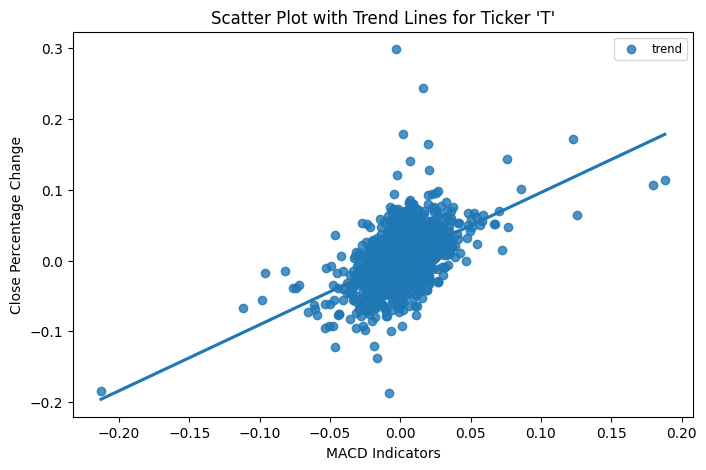

In [210]:
# Generate a scatter plot with a trend line for trend_macd and macd_sig_line against close_pctc
plt.figure(figsize=(8,5))

# Plot trend_macd vs close_pctc
sns.regplot(x=d2['mkt_returns_diff'], y=d2['close_pctc'], 
            scatter=True, label="trend", ci=None)

plt.xlabel("MACD Indicators")
plt.ylabel("Close Percentage Change")
plt.title("Scatter Plot with Trend Lines for Ticker 'T'")
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1, 1))
plt.show()

In [211]:
df_2.ticker_id.value_counts()

ticker_id
T        2171
VZ       2171
BRK-B    2171
JPM      2171
BAC      2171
GS       2171
LLY      2171
UNH      2171
BSX      2171
SYK      2171
ISRG     2171
HCA      2171
IBM      2171
TYL      2171
AAPL     2171
MSFT     2171
NVDA     2171
CB       2171
PGR      2171
COP      2171
AMZN     2171
GOOG     2171
META     2171
NFLX     2171
DIS      2171
MCD      2171
AZO      2171
HD       2171
OKE      2171
TSLA     2171
BKNG     2171
CTRA     2171
XOM      2171
CVX      2171
EOG      2171
CRM      2171
Name: count, dtype: int64

In [212]:
df_2.ticker_id.value_counts()/240 #that is approx 9 years of data

ticker_id
T       9.0458
VZ      9.0458
BRK-B   9.0458
JPM     9.0458
BAC     9.0458
GS      9.0458
LLY     9.0458
UNH     9.0458
BSX     9.0458
SYK     9.0458
ISRG    9.0458
HCA     9.0458
IBM     9.0458
TYL     9.0458
AAPL    9.0458
MSFT    9.0458
NVDA    9.0458
CB      9.0458
PGR     9.0458
COP     9.0458
AMZN    9.0458
GOOG    9.0458
META    9.0458
NFLX    9.0458
DIS     9.0458
MCD     9.0458
AZO     9.0458
HD      9.0458
OKE     9.0458
TSLA    9.0458
BKNG    9.0458
CTRA    9.0458
XOM     9.0458
CVX     9.0458
EOG     9.0458
CRM     9.0458
Name: count, dtype: float64

In [213]:
df.dividends.value_counts()

dividends
0    79908
1      840
Name: count, dtype: int64

In [214]:
df.earnings_date_flag.value_counts()

earnings_date_flag
0    79484
1     1264
Name: count, dtype: int64

In [215]:
#duplicate check
df_2[df_2.duplicated(keep=False)]

,date,open,high,low,close,volume,dividends,ticker_id,sector,vix,eps_estimate,reported_eps,surprise_,earnings_date_flag,pe_ratio,1_mo_int,6_mo_int,1_yr_int,10_yr_int,sp500_open,sp500_high,sp500_low,sp500_price,sp500_volume,open_close,high_low,high_open_low,mkt_returns,sp500_oc,sp500_lh,sp500_loh,50_day_avg_sp500,150_day_avg_sp500,50_day_avg_sp500_relative,150_day_avg_sp500_relative,sp500_bull_bear,sp500_bb_diff,rolling_beta,ln_volume,beta_vol_interaction,beta_close,beta_close_relative,ema_fast,ema_slow,trend_macd,macd_sig_line,macd_relative_close,macd_sig_line_relative_close,momentum_rsi,momentum_rsi_relative,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbm_relative,volatility_bbh_relative,volatility_bbl_relative,volatility_width_relative,volatility_bb_width,tr,volatility_atr,tr_relative,volatility_atr_relative,close_pctc,mkt_returns_pctc,macd_relative_close_pctc,macd_sig_line_relative_close_pctc,momentum_rsi_relative_pctc,volatility_bb_width_pctc,sp500_oc_pctc,sp500_loh_pctc,sp500_lh_pctc,open_close_pctc,high_low_pctc,high_open_low_pctc,tr_relative_pctc,volatility_atr_relative_pctc,volume_pctc,vix_pctc,beta_vol_interaction_pctc,beta_close_pctc,beta_close_relative_pctc,pe_ratio_pctc,1_mo_int_pctc,6_mo_int_pctc,1_yr_int_pctc,10_yr_int_pctc,mkt_returns_diff,pe_ratio_diff,1_mo_int_diff,6_mo_int_diff,1_yr_int_diff,10_yr_int_diff


In [216]:
df_2.isnull().sum().sum()

0

In [217]:
df_2.to_csv('dataset_0222.csv',index=False)